<a href="https://colab.research.google.com/github/Nagababu91768/SparkFoundation/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- # <font color="#e71989"> Author : U. Nagababu </font>
- # <font color='#e71989'> Task : Predict the optimum number of cluster and represent visually </font>


In [1]:
import pandas as pd,numpy as np
from sklearn.cluster import KMeans

## Import the dataset 

In [2]:
df=pd.read_csv('/content/sample_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Shape of the Dataset 

In [3]:
df.shape 

(150, 6)

## Columns in dataset
##### <font color="magenta">Values function used to convert pandas.core.indexes.base.Index to numpy arry ( ndarray )

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.columns[:].values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

## Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Species is the column in dataset , now we find number of optimize clusters

In [7]:
## find out unique values from Species 
no_dup=[]
for i in df.iloc[:,-1]:
  if i not in no_dup:
    no_dup.append(i)

In [8]:
no_dup

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [9]:
# Other way using sets
set(df.iloc[:,-1])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

## <font color="green">Lets starts with KMeans for detect optimum number of cluster

In [10]:
x=df.iloc[:,:-1].values
scores=[]
for i in range(1,20):
  Km=KMeans(n_clusters=i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
  Km.fit(x)
  scores.append(Km.inertia_)

In [11]:
scores

[281918.3244,
 70616.29893333334,
 31326.8868,
 17778.669815078232,
 11488.077318452379,
 7930.727651282052,
 5925.373167419537,
 4556.205108187133,
 3594.826708333333,
 2954.320105742296,
 2474.200386446886,
 2045.4971428571428,
 1797.6371200466197,
 1571.6913282828284,
 1343.2618888888887,
 1233.4279924242423,
 1082.867,
 981.5793571428571,
 874.3819246031746]

In [12]:
import matplotlib.pyplot as plt 

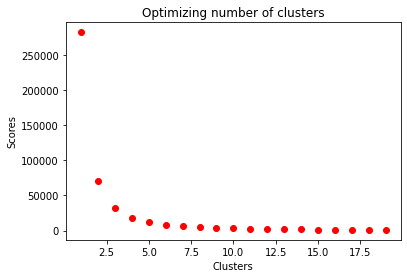

In [13]:
plt.plot(range(1,20),scores,'or')
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.title("Optimizing number of clusters")
plt.show()

In [14]:
Km_Pred=KMeans(n_clusters=3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
Pred= Km_Pred.fit_predict(x)

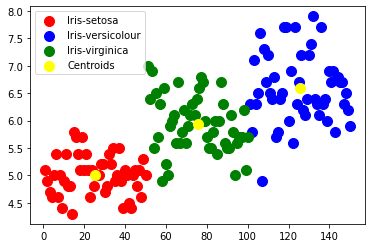

In [15]:
plt.scatter(x[Pred == 0, 0], x[Pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[Pred == 1, 0], x[Pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[Pred == 2, 0], x[Pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Km_Pred.cluster_centers_[:, 0], Km_Pred.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

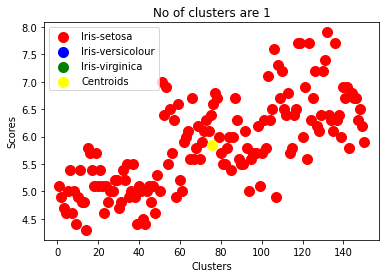

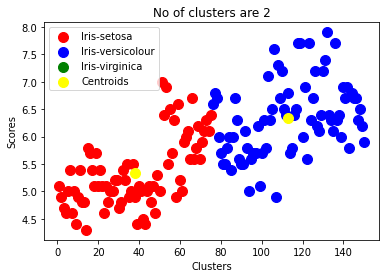

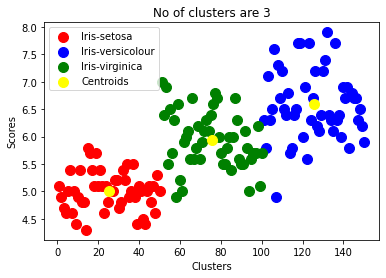

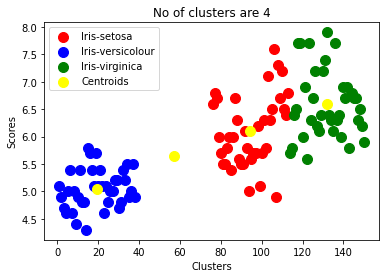

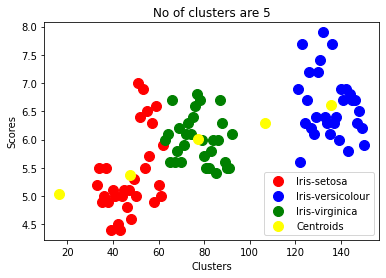

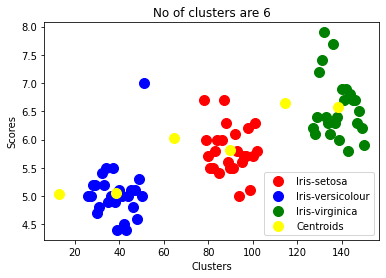

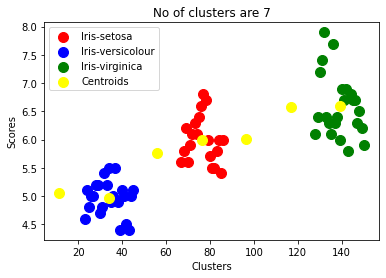

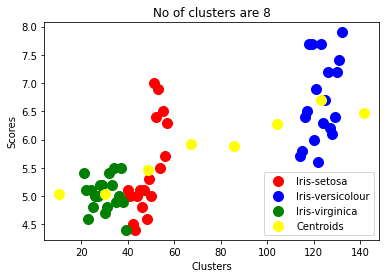

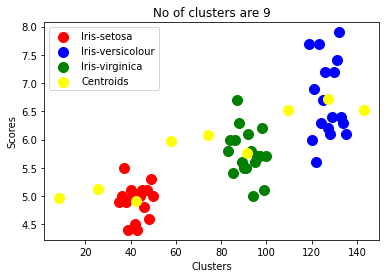

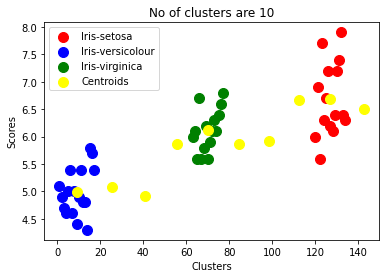

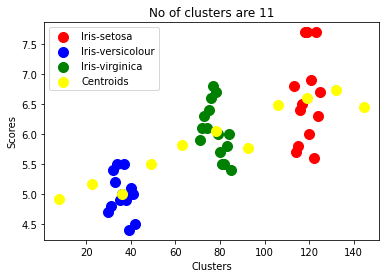

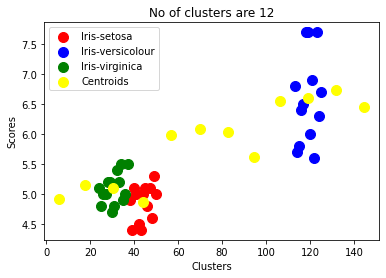

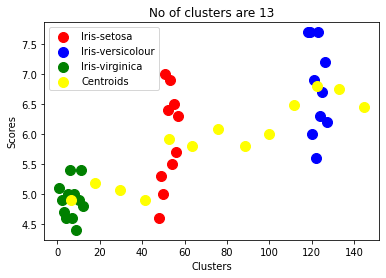

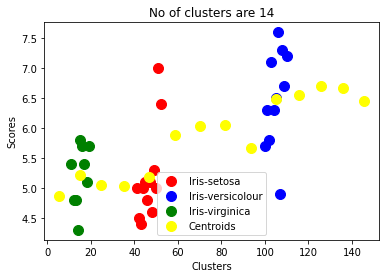

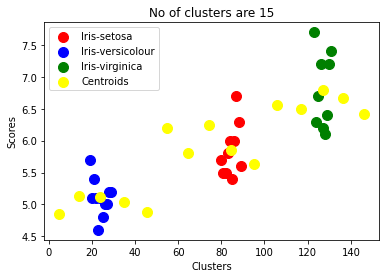

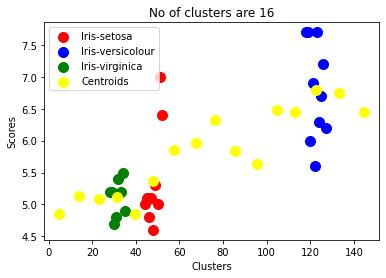

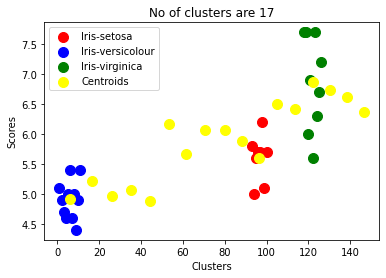

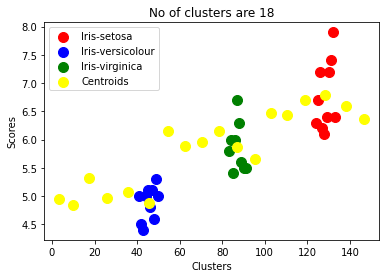

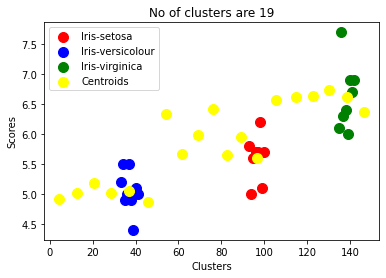

In [16]:
for i in range(1,20):
  Km_Pred=KMeans(n_clusters=i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
  Pred= Km_Pred.fit_predict(x)
  plt.scatter(x[Pred == 0, 0], x[Pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
  plt.scatter(x[Pred == 1, 0], x[Pred == 1, 1], 
              s = 100, c = 'blue', label = 'Iris-versicolour')
  plt.scatter(x[Pred == 2, 0], x[Pred == 2, 1],
              s = 100, c = 'green', label = 'Iris-virginica')

  # Plotting the centroids of the clusters
  plt.scatter(Km_Pred.cluster_centers_[:, 0], Km_Pred.cluster_centers_[:,1], 
              s = 100, c = 'yellow', label = 'Centroids')
  plt.legend()
  plt.title("No of clusters are {}".format(i))
  plt.xlabel("Clusters")
  plt.ylabel("Scores")
  plt.show()

 

<font color="magenta" > ## Completed Task -2 